In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [37]:
# Load the dataset
file_path1 = './data/cleaned_data/heart_cleaned.csv'  
df = pd.read_csv(file_path1)

file_path2 = './data/raw_data/heart.csv'  
raw_df = pd.read_csv(file_path2)

In [38]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


## 1. In the first phase of our EDA, we examine insights into the general distribution of the data and the characteristics of each variable, with a primary focus on the differences between heart disease and no heart disease.

C:\Users\aaron\AppData\Local\Temp\ipykernel_78736\1932658432.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='HeartDisease', palette=colors)


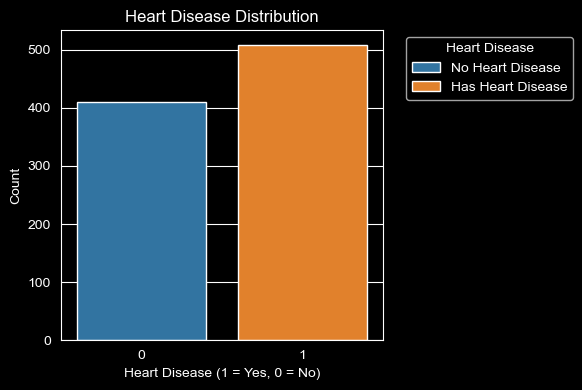

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

# Check if data is balanced
plt.figure(figsize=(6, 4))

# Define colors for the bars
colors = ['#1f77b4', '#ff7f0e']  # Blue for 0, Orange for 1

# Create the countplot with specified colors
sns.countplot(data=df, x='HeartDisease', palette=colors)

# Add a title
plt.title('Heart Disease Distribution')

# Add labels to the axes
plt.xlabel('Heart Disease (1 = Yes, 0 = No)')
plt.ylabel('Count')

# Add legend outside the plot area on the right
plt.legend(['No Heart Disease', 'Has Heart Disease'], title='Heart Disease', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to make space for the legend
plt.tight_layout()

# Show the plot
plt.show()


In [40]:
columns_to_count = df.select_dtypes(include=['float64', 'int64']).drop('HeartDisease', axis=1)
num_columns = columns_to_count.shape[1]
columns = columns_to_count.columns.tolist()

print(f'totaly {num_columns} columns：')
print(columns)

totaly 11 columns：
['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']


In [41]:
categorical_columns = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
numeric_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']  

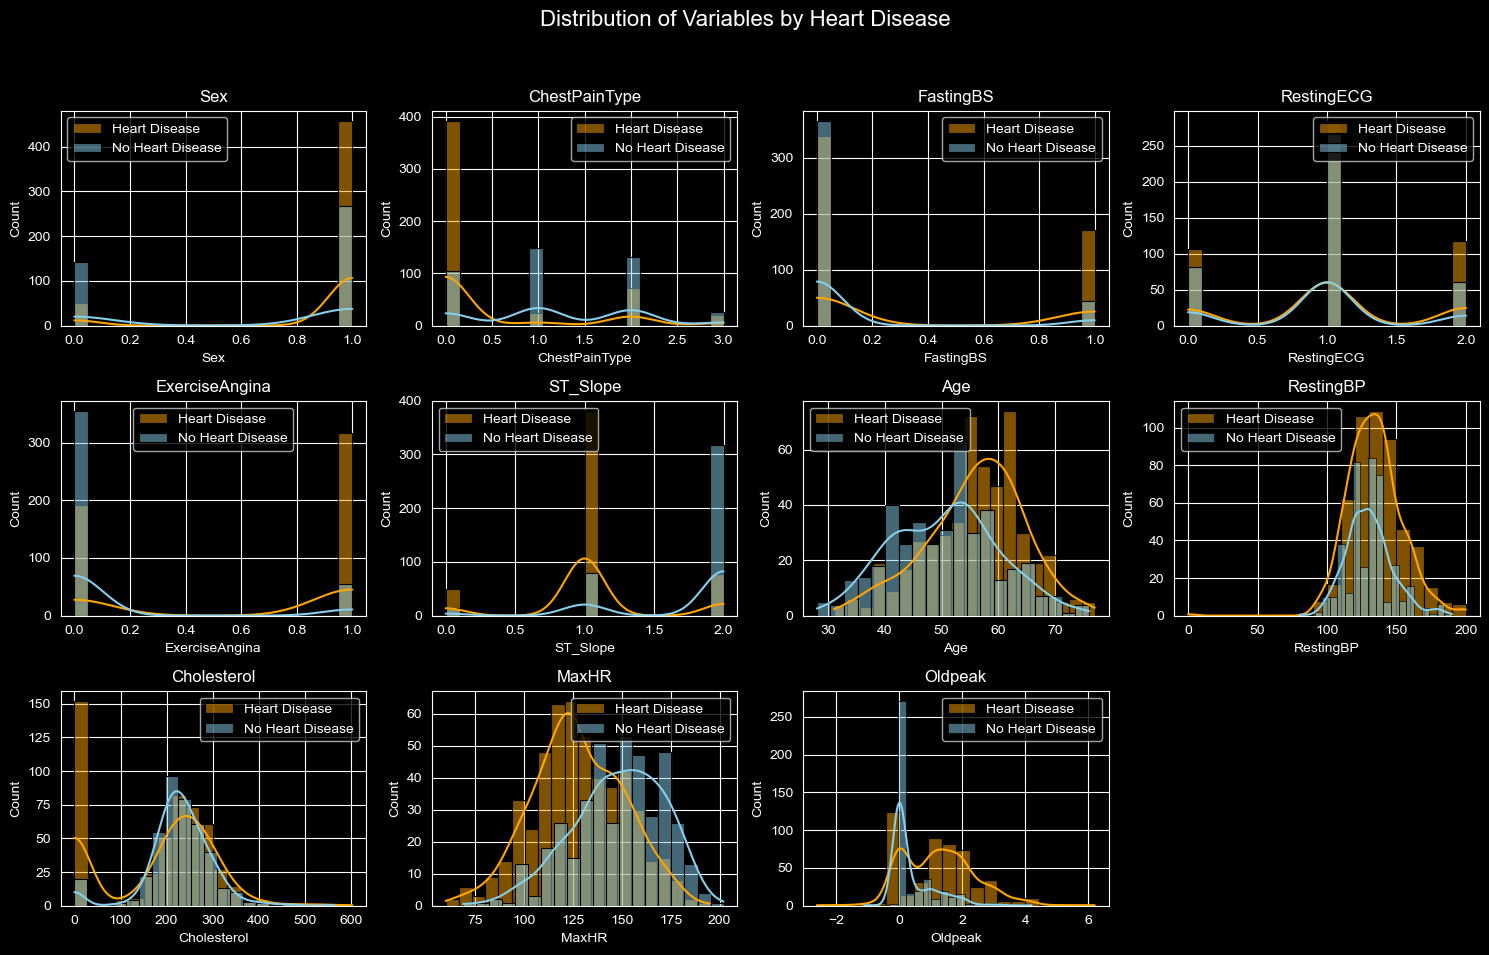

In [42]:
# Create histogram for each variable
columns_to_plot = categorical_columns + numeric_columns
plt.figure(figsize=(15, 10))
for idx, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 4, idx)  
    
    sns.histplot(df[df['HeartDisease'] == 1][column], bins=20, color='orange', kde=True, edgecolor='black', alpha=0.5, label='Heart Disease')
    sns.histplot(df[df['HeartDisease'] == 0][column], bins=20, color='skyblue', kde=True, edgecolor='black', alpha=0.5, label='No Heart Disease')
    
    plt.title(column)
    plt.legend()

plt.suptitle('Distribution of Variables by Heart Disease', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  
plt.show()

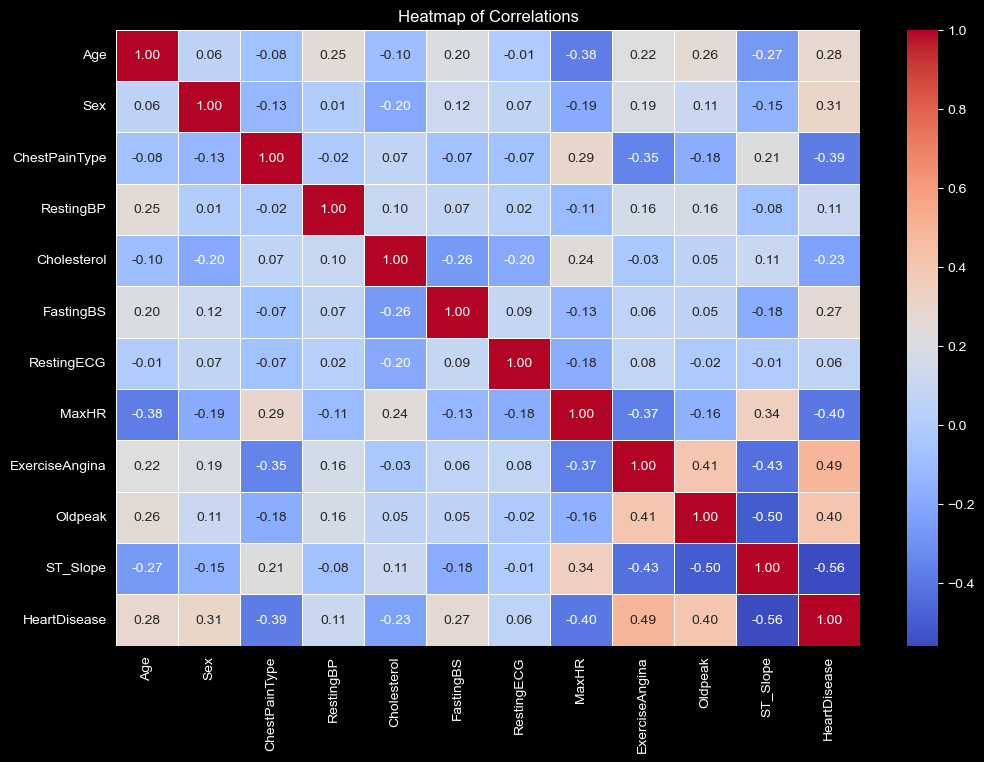

In [43]:
#  Heatmap of correlation between variables
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Correlations')
plt.show()

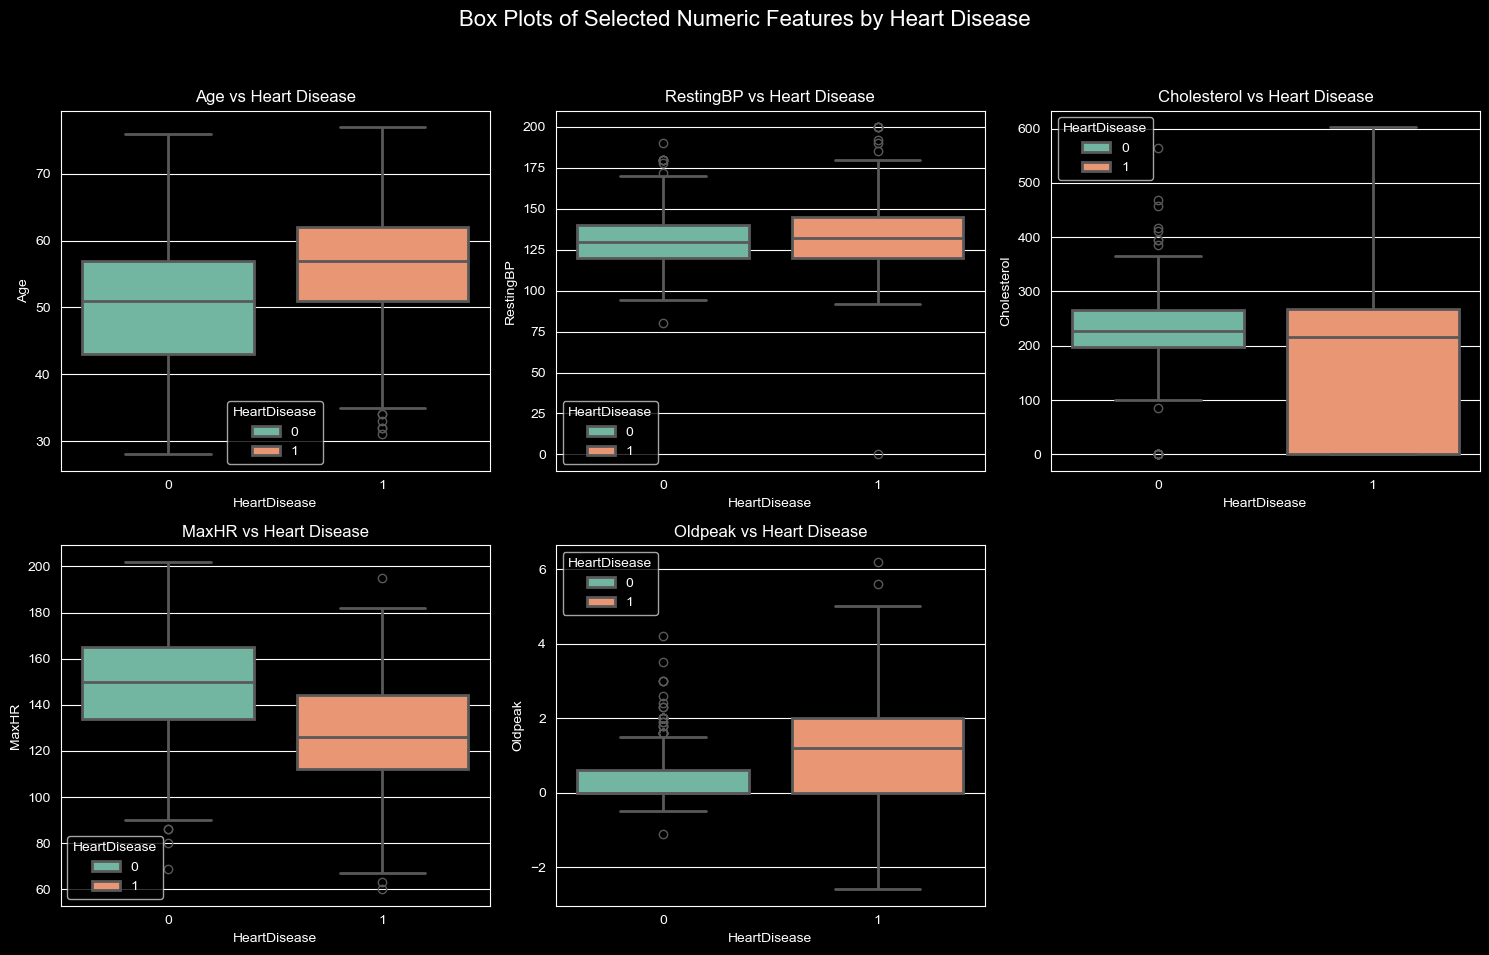

In [44]:
plt.figure(figsize=(15, 10))
for idx, feature in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, idx)  
    sns.boxplot(data=df, x='HeartDisease', y=feature, hue='HeartDisease', palette="Set2", linewidth=2)
    plt.title(f'{feature} vs Heart Disease')

plt.suptitle('Box Plots of Selected Numeric Features by Heart Disease', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  
plt.show()

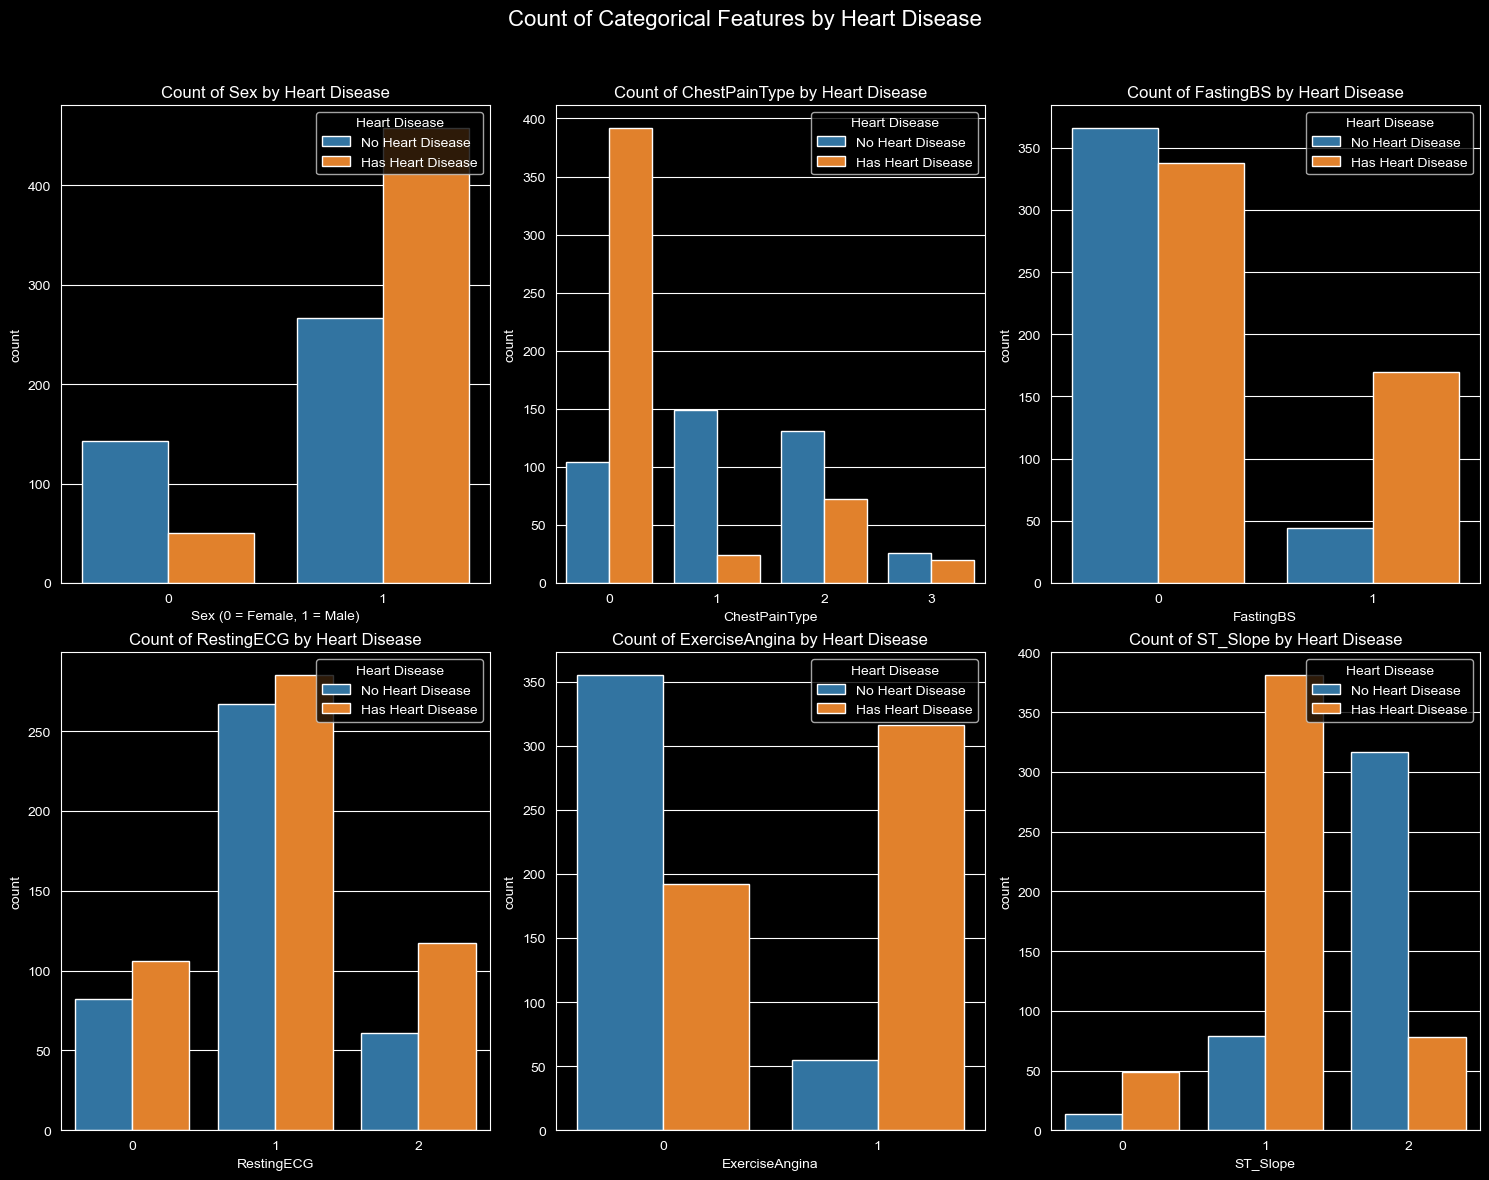

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of categorical features
plt.figure(figsize=(15, 12))

for idx, feature in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, idx)
    ax = sns.countplot(data=df, x=feature, hue="HeartDisease", palette=['#1f77b4', '#ff7f0e'])
    
    # Update legend labels
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, ['No Heart Disease', 'Has Heart Disease'], title='Heart Disease', loc='upper right')
    
    # Add specific labels for Sex
    if feature == 'Sex':
        plt.xlabel('Sex (0 = Female, 1 = Male)')
    
    # Add title for each subplot
    plt.title(f'Count of {feature} by Heart Disease')

# Adjust layout for better spacing
plt.tight_layout()

# Add an overall title for the entire figure
plt.suptitle('Count of Categorical Features by Heart Disease', fontsize=16)

# Adjust spacing for the overall title
plt.subplots_adjust(top=0.9)

# Show the plot
plt.show()


## 2. In the second phase of our EDA, we analyze gender differences within the data

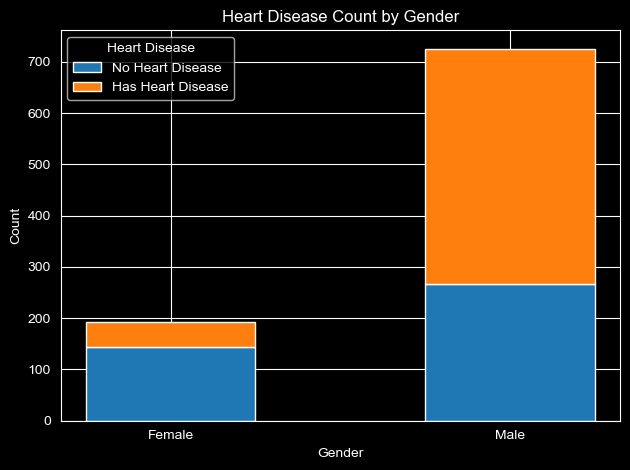

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# Count the number of males and females with and without heart disease
male_counts = df[df['Sex'] == 1]['HeartDisease'].value_counts().sort_index()
female_counts = df[df['Sex'] == 0]['HeartDisease'].value_counts().sort_index()

# Ensure both categories (0 and 1) exist
male_no_disease = male_counts.get(0, 0)  # Male without heart disease
male_with_disease = male_counts.get(1, 0)  # Male with heart disease
female_no_disease = female_counts.get(0, 0)  # Female without heart disease
female_with_disease = female_counts.get(1, 0)  # Female with heart disease

# Data for plotting
labels = ['Female', 'Male']
no_disease = [female_no_disease, male_no_disease]
with_disease = [female_with_disease, male_with_disease]

# Plot the stacked bar chart
x = np.arange(len(labels))  # X-axis positions
width = 0.5  # Width of the bars

plt.bar(x, no_disease, width, label='No Heart Disease', color='#1f77b4')
plt.bar(x, with_disease, width, bottom=no_disease, label='Has Heart Disease', color='#ff7f0e')

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Heart Disease Count by Gender')
plt.xticks(x, labels)  # Add labels for x-axis
plt.legend(title='Heart Disease')

# Show the plot
plt.tight_layout()
plt.show()


### The data is significantly imbalanced during sampling, with a much larger proportion of male data compared to female data

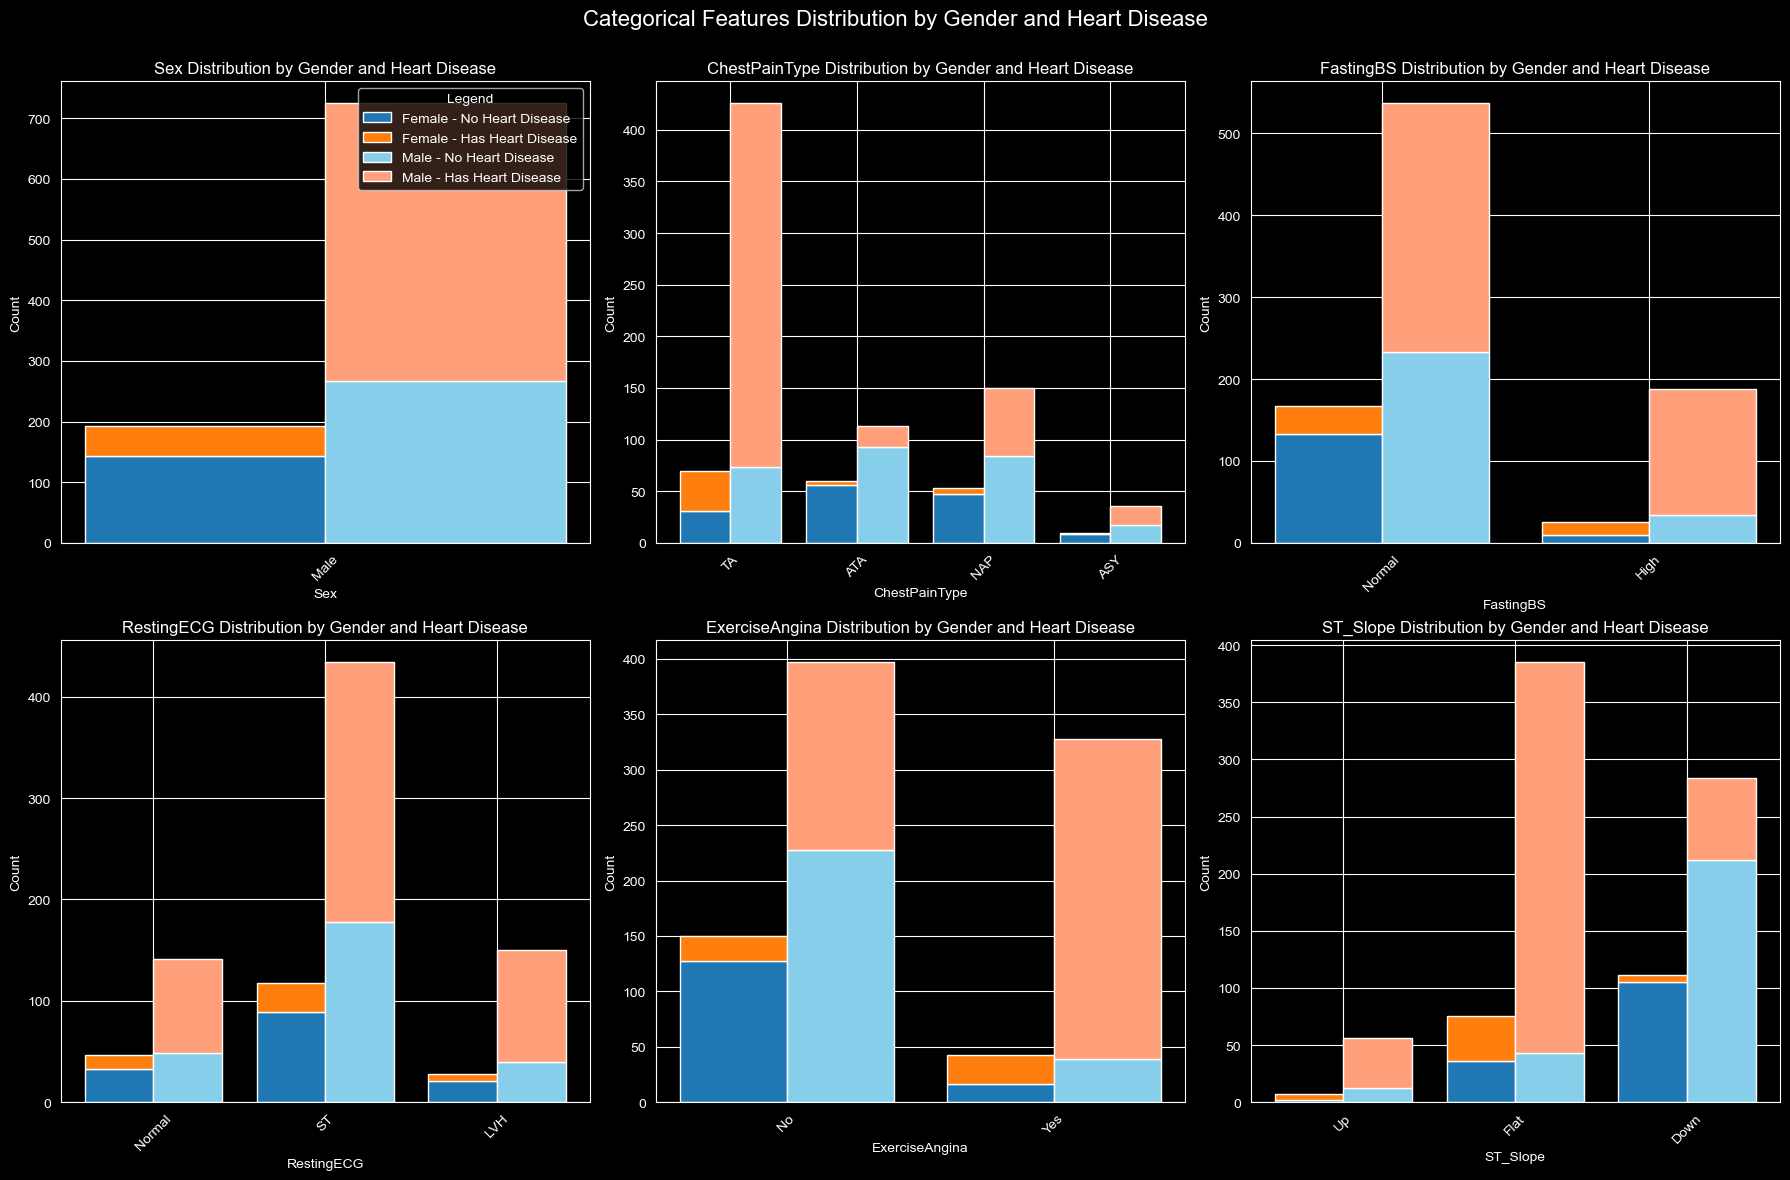

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Mapping for better X-axis labels
feature_mapping = {
    'Sex': {0: 'Female', 1: 'Male'},
    'FastingBS': {0: 'Normal', 1: 'High'},
    'ExerciseAngina': {0: 'No', 1: 'Yes'},
    'ST_Slope': {0: 'Up', 1: 'Flat', 2: 'Down'},
    'RestingECG': {0: 'Normal', 1: 'ST', 2: 'LVH'},
    'ChestPainType': {0: 'TA', 1: 'ATA', 2: 'NAP', 3: 'ASY'}
}

# Categorical columns to plot
categorical_columns = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Plot distribution of categorical features
plt.figure(figsize=(18, 12))

for idx, feature in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, idx)
    
    # Calculate counts grouped by Gender, HeartDisease, and the feature
    feature_counts = df.groupby(['Sex', feature, 'HeartDisease']).size().unstack(fill_value=0)
    
    # Extract male and female data separately
    male_data = feature_counts.loc[1] if 1 in feature_counts.index else pd.DataFrame(0, index=feature_counts.columns, columns=[0, 1])
    female_data = feature_counts.loc[0] if 0 in feature_counts.index else pd.DataFrame(0, index=feature_counts.columns, columns=[0, 1])
    
    # Map feature values to readable labels (if mapping exists)
    if feature in feature_mapping:
        male_data.index = male_data.index.map(feature_mapping[feature])
        female_data.index = female_data.index.map(feature_mapping[feature])
    
    # Data for plotting
    labels = male_data.index  # The feature levels (e.g., values of 'ChestPainType')
    x = np.arange(len(labels))  # X positions for grouped bars
    width = 0.4  # Width of the bars

    # Plot Female data (stacked)
    plt.bar(x - width / 2, female_data[0], width, label='Female - No Heart Disease', color='#1f77b4')
    plt.bar(x - width / 2, female_data[1], width, bottom=female_data[0], label='Female - Has Heart Disease', color='#ff7f0e')
    
    # Plot Male data (stacked)
    plt.bar(x + width / 2, male_data[0], width, label='Male - No Heart Disease', color='#87CEEB')
    plt.bar(x + width / 2, male_data[1], width, bottom=male_data[0], label='Male - Has Heart Disease', color='#FFA07A')

    # Add X-axis labels and subplot title
    plt.xticks(x, labels, rotation=45)
    plt.title(f'{feature} Distribution by Gender and Heart Disease')
    plt.xlabel(feature)
    plt.ylabel('Count')

    # Add legend only for the first subplot to avoid repetition
    if idx == 1:
        plt.legend(title='Legend', loc='upper right')

# Adjust layout for better spacing
plt.tight_layout()

# Add an overall title for the entire figure
plt.suptitle('Categorical Features Distribution by Gender and Heart Disease', fontsize=16)
plt.subplots_adjust(top=0.92)

# Show the plot
plt.show()


##  3. In the third phase of our EDA, we analyze the data across various age groups.

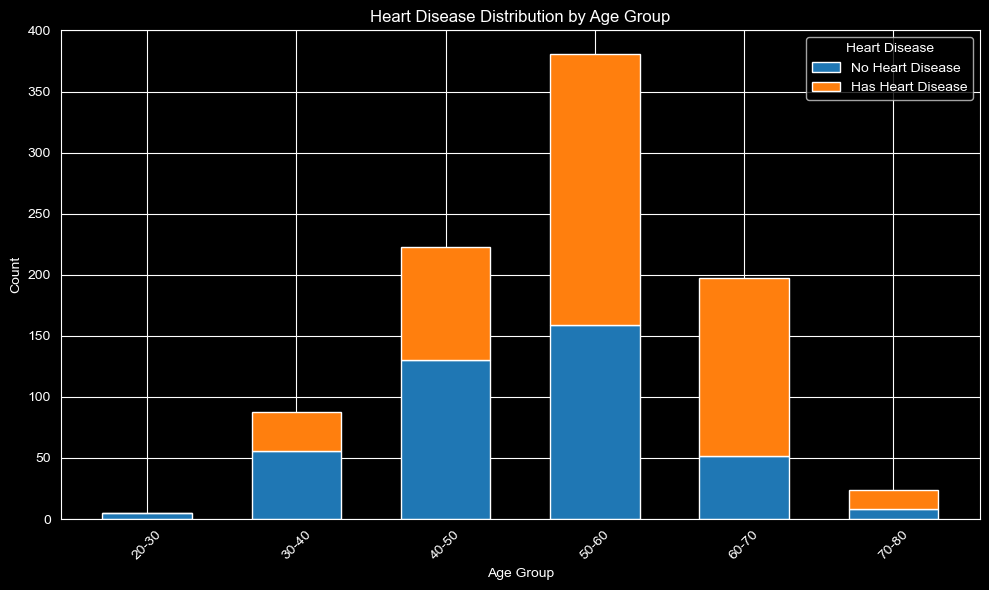

In [48]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Binning Age into discrete groups for better visualization
bins = [20, 30, 40, 50, 60, 70, 80]  # Define age groups
df['AgeGroup'] = pd.cut(df['Age'], bins, labels=[f'{bins[i]}-{bins[i+1]}' for i in range(len(bins)-1)])

# Group by AgeGroup and HeartDisease, count the occurrences
age_group_counts = df.groupby(['AgeGroup', 'HeartDisease']).size().unstack(fill_value=0)

# Plotting the data
plt.figure(figsize=(10, 6))

x = np.arange(len(age_group_counts.index))  # X positions for bars
width = 0.6  # Width of the bars

# Stacked bar chart
plt.bar(x, age_group_counts[0], width, label='No Heart Disease', color='#1f77b4')
plt.bar(x, age_group_counts[1], width, bottom=age_group_counts[0], label='Has Heart Disease', color='#ff7f0e')

# Add labels and title
plt.xticks(x, age_group_counts.index, rotation=45)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Heart Disease Distribution by Age Group')
plt.legend(title='Heart Disease')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


### The data is imbalanced by age during sampling as well

C:\Users\aaron\AppData\Local\Temp\ipykernel_78736\3870160881.py:70: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


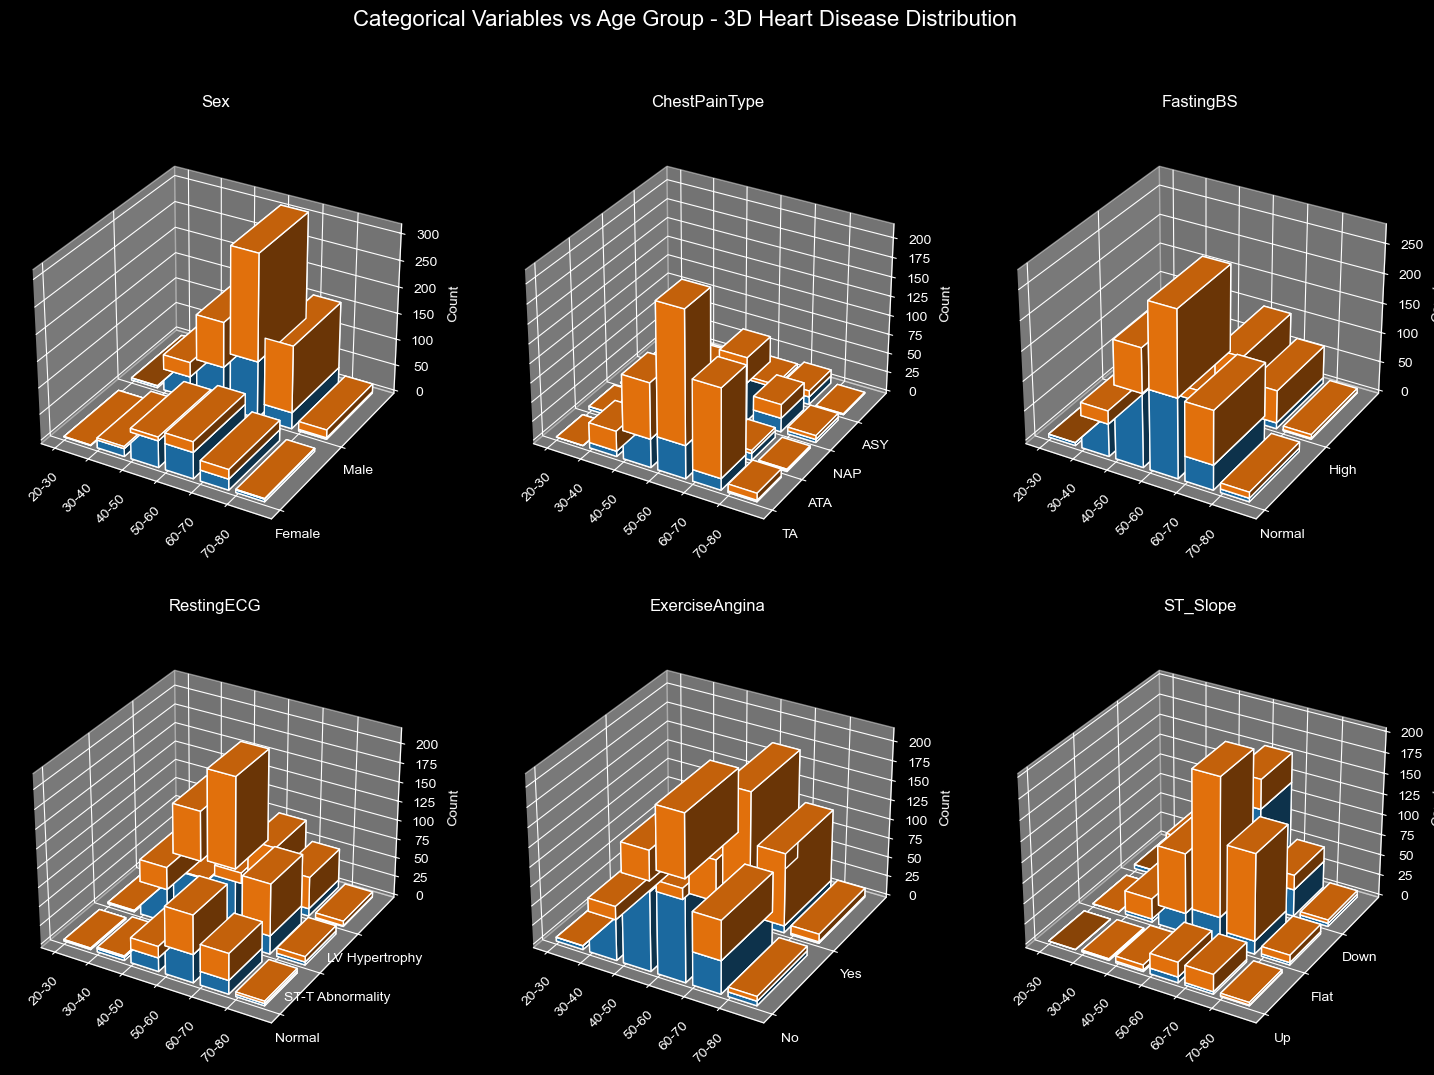

In [49]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Define the age bins and create the AgeGroup column
bins = [20, 30, 40, 50, 60, 70, 80]
df['AgeGroup'] = pd.cut(df['Age'], bins, labels=[f'{bins[i]}-{bins[i+1]}' for i in range(len(bins)-1)])

# Define the categorical variables to plot
categorical_columns = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Mapping for Y-axis labels
feature_mapping = {
    'Sex': {0: 'Female', 1: 'Male'},
    'ChestPainType': {0: 'TA', 1: 'ATA', 2: 'NAP', 3: 'ASY'},
    'FastingBS': {0: 'Normal', 1: 'High'},
    'RestingECG': {0: 'Normal', 1: 'ST-T Abnormality', 2: 'LV Hypertrophy'},
    'ExerciseAngina': {0: 'No', 1: 'Yes'},
    'ST_Slope': {0: 'Up', 1: 'Flat', 2: 'Down'}
}

# Create a figure
fig = plt.figure(figsize=(18, 12))

for idx, feature in enumerate(categorical_columns, 1):
    ax = fig.add_subplot(2, 3, idx, projection='3d')
    
    # Group by AgeGroup, current feature, and HeartDisease
    grouped = df.groupby(['AgeGroup', feature, 'HeartDisease']).size().unstack(fill_value=0).reset_index()
    
    # Prepare data for plotting
    x_labels = df['AgeGroup'].cat.categories
    y_labels = grouped[feature].unique()
    
    # Map Y-axis labels if the feature exists in the mapping
    if feature in feature_mapping:
        y_labels_mapped = [feature_mapping[feature].get(label, label) for label in y_labels]
    else:
        y_labels_mapped = y_labels
    
    x_pos, y_pos = np.meshgrid(np.arange(len(x_labels)), np.arange(len(y_labels)), indexing="ij")
    x_pos = x_pos.ravel()
    y_pos = y_pos.ravel()
    
    z_pos = np.zeros_like(x_pos)
    dx = dy = 0.8  # Width and depth of bars
    
    # Heights for no heart disease
    heights_no_hd = grouped.pivot(index='AgeGroup', columns=feature, values=0).fillna(0).values.ravel()
    ax.bar3d(x_pos, y_pos, z_pos, dx, dy, heights_no_hd, shade=True, color='#1f77b4', label='No Heart Disease')
    
    # Heights for heart disease
    z_pos_hd = heights_no_hd
    heights_hd = grouped.pivot(index='AgeGroup', columns=feature, values=1).fillna(0).values.ravel()
    ax.bar3d(x_pos, y_pos, z_pos_hd, dx, dy, heights_hd, shade=True, color='#ff7f0e', label='Has Heart Disease')
    
    # Set axis labels
    ax.set_xticks(np.arange(len(x_labels)))
    ax.set_xticklabels(x_labels, rotation=45)
    ax.set_yticks(np.arange(len(y_labels)))
    ax.set_yticklabels(y_labels_mapped)  # Use mapped labels for Y-axis
    #ax.set_xlabel('Age Group')
    ax.set_zlabel('Count')
    
    # Set the title as the feature name
    ax.set_title(feature, fontsize=12, pad=20)

# Adjust layout
plt.tight_layout()
plt.suptitle('Categorical Variables vs Age Group - 3D Heart Disease Distribution', fontsize=16, y=0.98)
plt.show()


## 4. In the fourth phase of our EDA, we explore insights into the proportions of individuals in the heart disease group and the non-heart disease group.

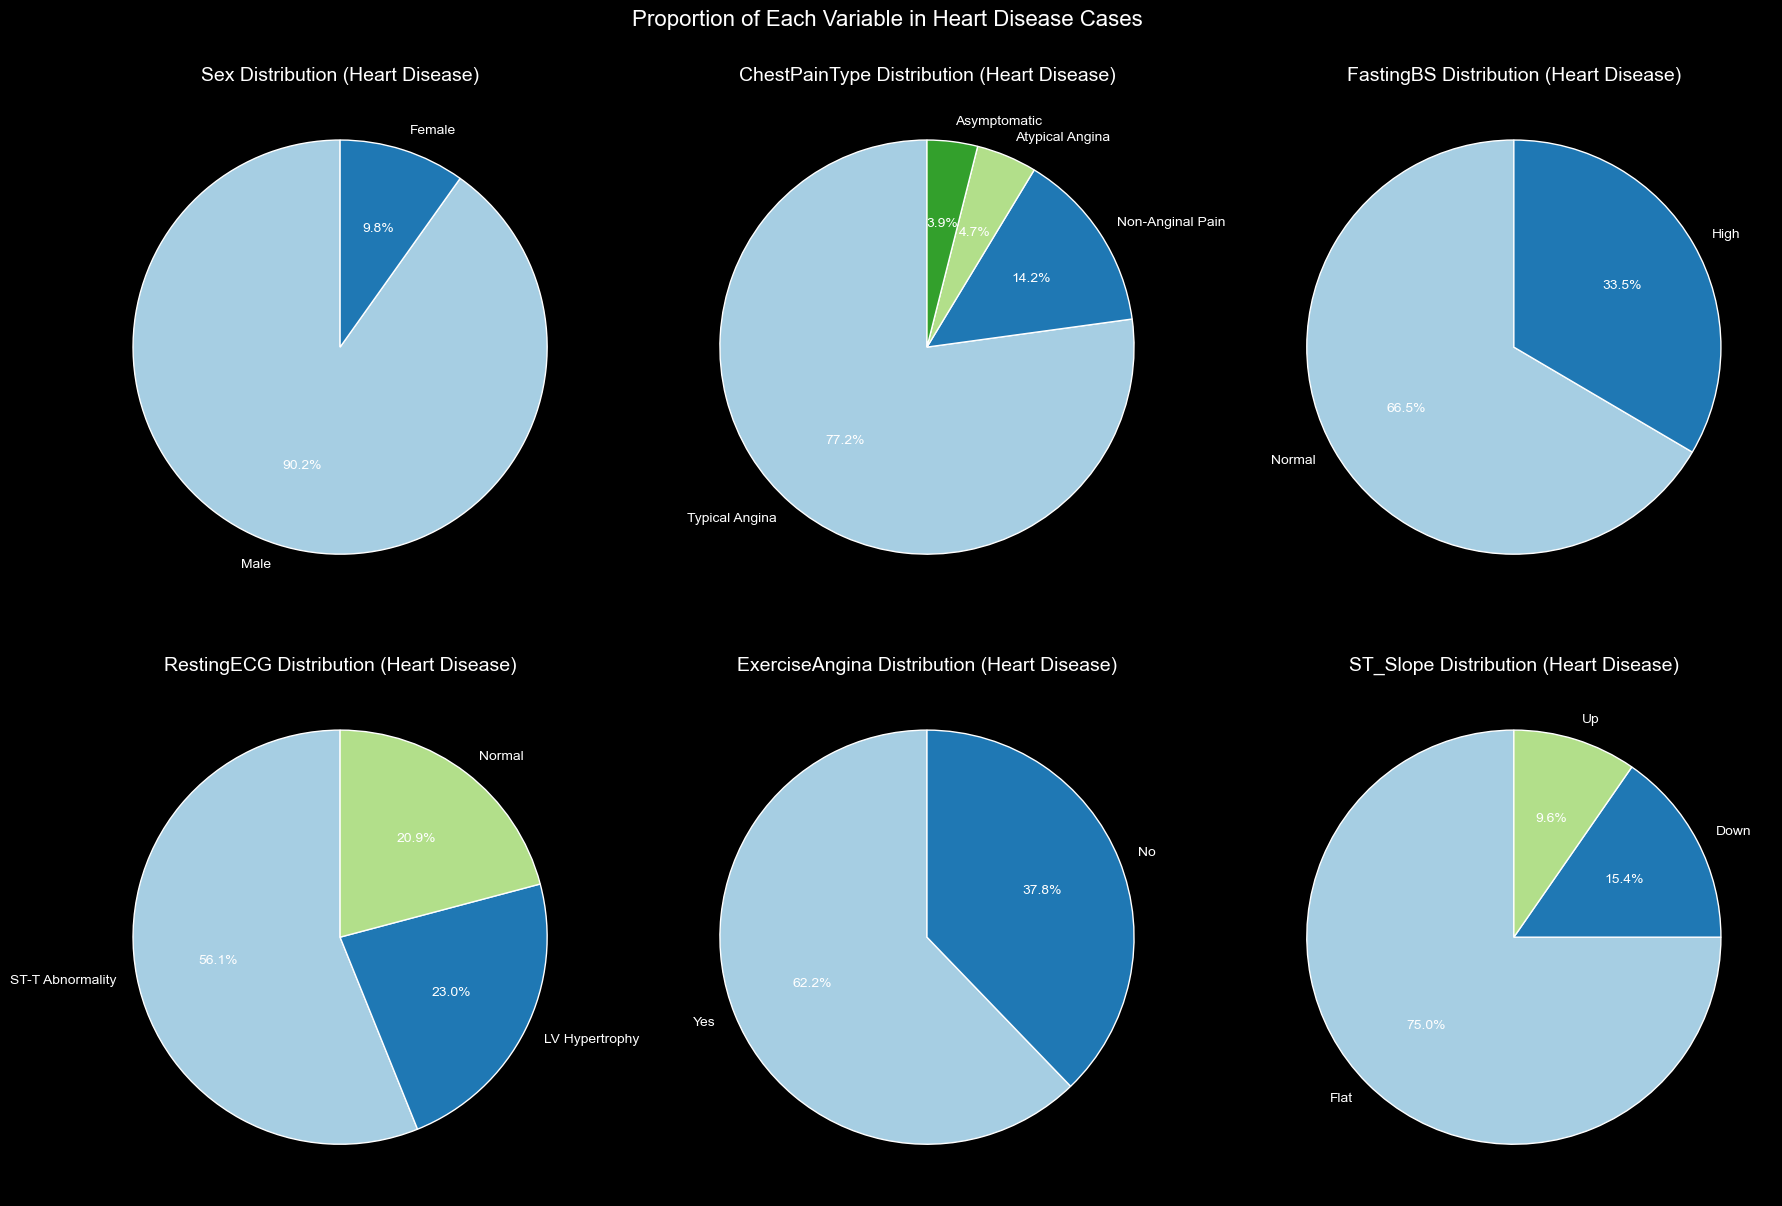

In [50]:
# Create a new DataFrame containing only rows with HeartDisease = 1
new_df_hd = df[df['HeartDisease'] == 1]

# Mapping for descriptive labels
feature_mapping = {
    'Sex': {0: 'Female', 1: 'Male'},
    'ChestPainType': {0: 'Typical Angina', 1: 'Atypical Angina', 2: 'Non-Anginal Pain', 3: 'Asymptomatic'},
    'FastingBS': {0: 'Normal', 1: 'High'},
    'RestingECG': {0: 'Normal', 1: 'ST-T Abnormality', 2: 'LV Hypertrophy'},
    'ExerciseAngina': {0: 'No', 1: 'Yes'},
    'ST_Slope': {0: 'Up', 1: 'Flat', 2: 'Down'}
}

# Create a figure for pie charts with descriptive labels
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

for idx, feature in enumerate(categorical_columns):
    ax = axes[idx // 3, idx % 3]  # Determine the position of the subplot
    
    # Count the occurrences of each category in the feature
    feature_counts = new_df_hd[feature].value_counts()
    
    # Map labels to their descriptive names if mapping exists
    if feature in feature_mapping:
        labels = [feature_mapping[feature].get(value, value) for value in feature_counts.index]
    else:
        labels = feature_counts.index
    
    # Plot the pie chart with descriptive labels
    ax.pie(
        feature_counts,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.Paired.colors
    )
    ax.set_title(f'{feature} Distribution (Heart Disease)', fontsize=14)

# Adjust layout and show the plot
plt.tight_layout()
plt.suptitle('Proportion of Each Variable in Heart Disease Cases', fontsize=16, y=1.02)
plt.show()


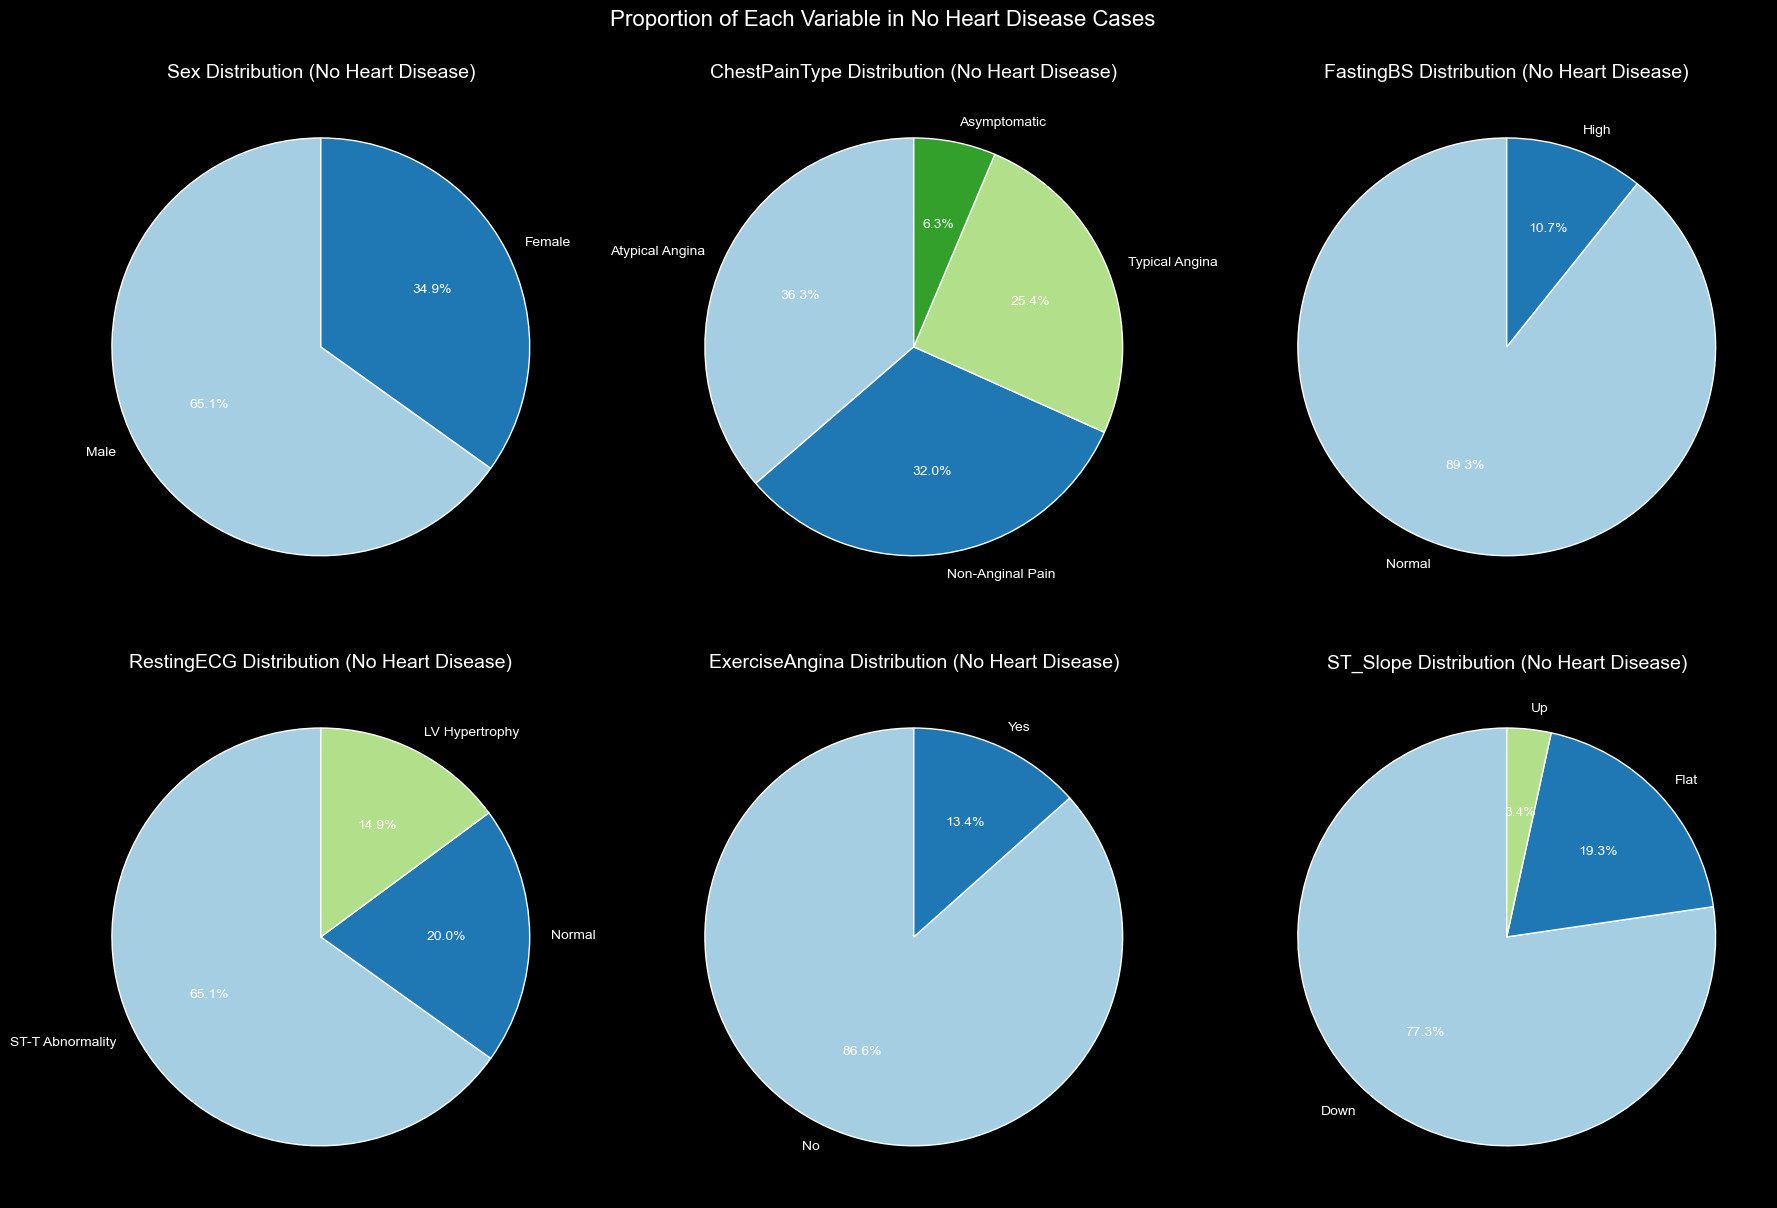

In [51]:
# Create a new DataFrame containing only rows with HeartDisease = 0
new_df_no_hd = df[df['HeartDisease'] == 0]

# Create a figure for pie charts with descriptive labels
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

for idx, feature in enumerate(categorical_columns):
    ax = axes[idx // 3, idx % 3]  # Determine the position of the subplot
    
    # Count the occurrences of each category in the feature
    feature_counts = new_df_no_hd[feature].value_counts()
    
    # Map labels to their descriptive names if mapping exists
    if feature in feature_mapping:
        labels = [feature_mapping[feature].get(value, value) for value in feature_counts.index]
    else:
        labels = feature_counts.index
    
    # Plot the pie chart with descriptive labels
    ax.pie(
        feature_counts,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.Paired.colors
    )
    ax.set_title(f'{feature} Distribution (No Heart Disease)', fontsize=14)

# Adjust layout and show the plot
plt.tight_layout()
plt.suptitle('Proportion of Each Variable in No Heart Disease Cases', fontsize=16, y=1.02)
plt.show()
